In [3]:
import pandas as pd

# **Loading The Dataset**

In [4]:
df = pd.read_csv('Experiment_2_modified(3-10).csv')
df

,Animal ID,Group,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL),Insulin Range
0,1,ST,0,180,116,14.125,High
1,2,ST,0,180,80,13.637,High
2,3,ST,0,206,159,17.686,High
3,4,ST,0,191,240,12.913,High
4,5,ST,0,188,44,10.430,High
...,...,...,...,...,...,...,...
211,32,RN,120,149,110,7.414,Medium
212,33,RN,120,214,106,8.221,Medium
213,34,RN,120,186,83,8.990,Medium
214,35,RN,120,140,99,4.545,Medium


# **Feature Engineering**

In [5]:
df.describe()

,Animal ID,Timepoint (min),Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL)
count,216.000000,216.000000,216.000000,216.000000,216.000000
mean,18.500000,52.500000,236.050926,104.726852,11.529282
std,10.412425,42.302895,65.609502,51.744672,3.068182
min,1.000000,0.000000,105.000000,22.000000,4.545000
25%,9.750000,15.000000,190.750000,71.250000,9.330000
50%,18.500000,45.000000,222.000000,92.500000,11.178000
75%,27.250000,90.000000,270.500000,128.000000,13.551750
max,36.000000,120.000000,464.000000,318.000000,22.011000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Animal ID              216 non-null    int64  
 1   Group                  216 non-null    object 
 2   Timepoint (min)        216 non-null    int64  
 3   Glucose (mg/dL)        216 non-null    int64  
 4   Triglycerides (mg/dL)  216 non-null    int64  
 5   Insulin (ng/mL)        216 non-null    float64
 6   Insulin Range          216 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.9+ KB


In [7]:
df.isnull().sum()

,0
Animal ID,0
Group,0
Timepoint (min),0
Glucose (mg/dL),0
Triglycerides (mg/dL),0
Insulin (ng/mL),0
Insulin Range,0


In [8]:
df.shape

(216, 7)

In [9]:
df = df.drop(columns=['Animal ID','Group','Timepoint (min)','Insulin Range'])
df

,Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL)
0,180,116,14.125
1,180,80,13.637
2,206,159,17.686
3,191,240,12.913
4,188,44,10.430
...,...,...,...
211,149,110,7.414
212,214,106,8.221
213,186,83,8.990
214,140,99,4.545


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

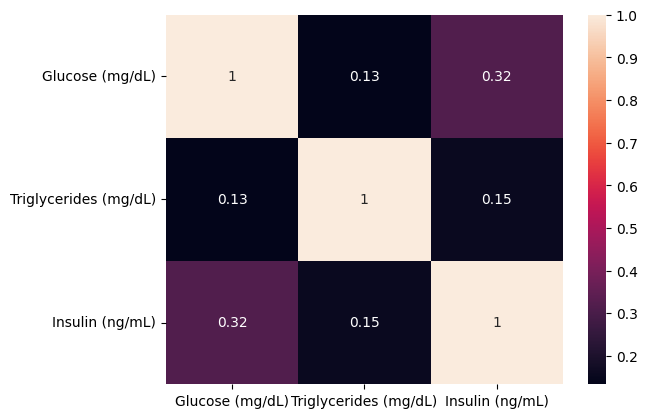

In [11]:
sns.heatmap(df.corr(),annot=True)

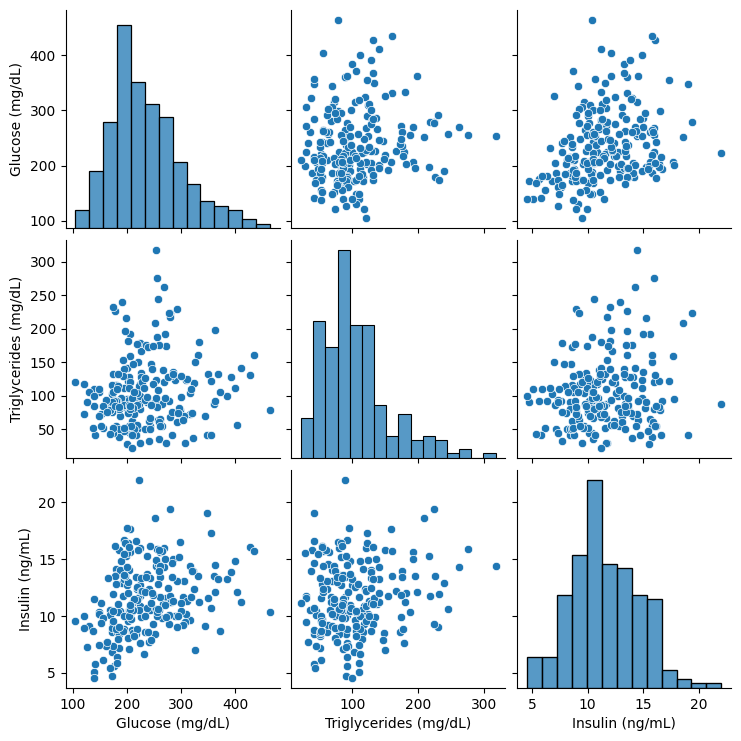

In [12]:
sns.pairplot(df)

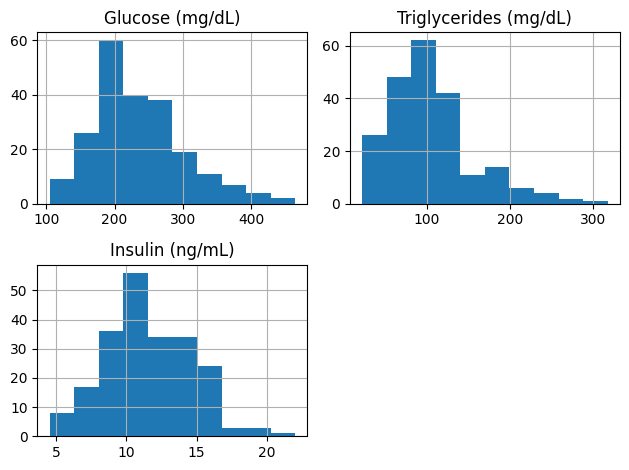

In [13]:
df.hist()
plt.tight_layout()

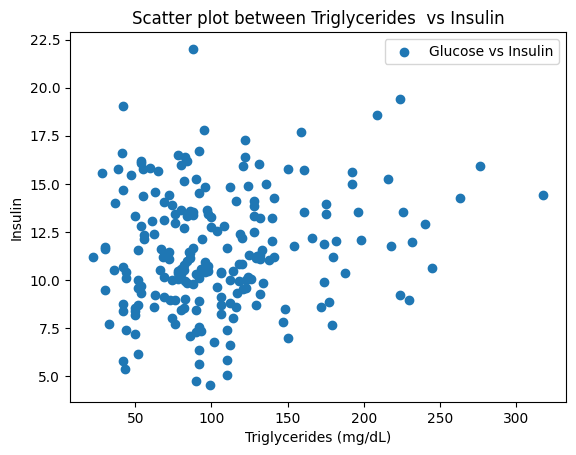

In [14]:
plt.scatter(df['Triglycerides (mg/dL)'],df['Insulin (ng/mL)'],label='Glucose vs Insulin')
plt.title("Scatter plot between Triglycerides  vs Insulin")
plt.xlabel("Triglycerides (mg/dL)")
plt.ylabel('Insulin')
plt.legend()
plt.show()

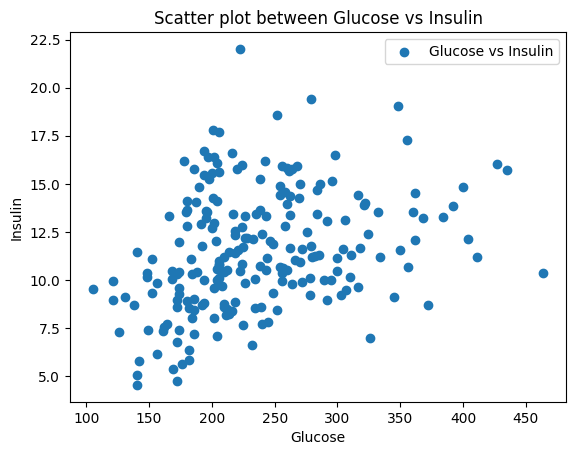

In [15]:
plt.scatter(df['Glucose (mg/dL)'],df['Insulin (ng/mL)'],label='Glucose vs Insulin')
plt.title("Scatter plot between Glucose vs Insulin")
plt.xlabel("Glucose")
plt.ylabel('Insulin')
plt.legend()
plt.show()

# **Cross Validation**

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x = df.drop(columns='Insulin (ng/mL)')
y = df['Insulin (ng/mL)']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_val = ['Glucose (mg/dL)','Triglycerides (mg/dL)','Insulin (ng/mL)']
df[numerical_val] = scaler.fit_transform(df[numerical_val])
df


,Glucose (mg/dL),Triglycerides (mg/dL),Insulin (ng/mL)
0,0.208914,0.317568,0.548494
1,0.208914,0.195946,0.520554
2,0.281337,0.462838,0.752376
3,0.239554,0.736486,0.479102
4,0.231198,0.074324,0.336940
...,...,...,...
211,0.122563,0.297297,0.164262
212,0.303621,0.283784,0.210466
213,0.225627,0.206081,0.254494
214,0.097493,0.260135,0.000000


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
Lmodel = LinearRegression()
Lmodel.fit(x_train,y_train)

LinearRegression()

In [22]:
predict = Lmodel.predict(x_test)
predict

array([11.44151624, 11.85674335,  9.92910712, 12.37675016, 11.43468373,
       10.04897897, 13.57957685, 10.71778779, 13.969809  , 10.78775629,
       10.93599607, 10.76578842, 10.94192047, 10.62178652, 10.39423758,
       10.39925387,  9.91617723, 11.03666767, 12.47123788, 11.56372325,
       12.44607003, 11.93069026, 10.53564485, 15.2505178 , 12.40057754,
       10.23363006, 15.06184502, 10.99982391,  9.47751199, 11.77851528,
       11.2445839 , 12.86060521, 11.0343325 ,  9.99405933, 10.49257401,
       11.25141641,  9.83937621, 10.55968841, 11.75637443, 13.80738526,
       11.5879398 , 12.17583942, 11.49937647, 11.28272493])

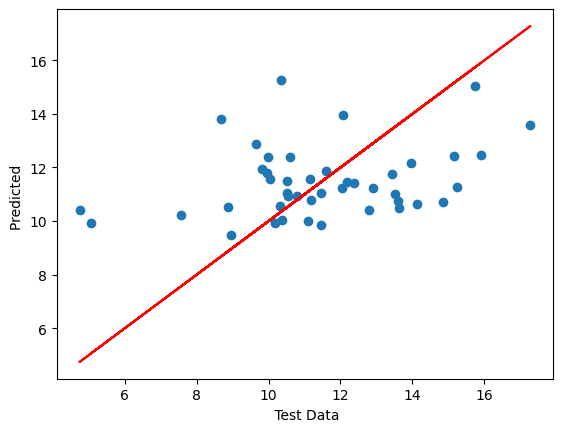

In [23]:
plt.scatter(y_test,predict)
plt.plot(y_test,y_test,'r')
plt.xlabel(' Test Data')
plt.ylabel('Predicted ')
plt.show()


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(y_test,predict)
mse

6.242226736048897

In [26]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [27]:
Rmodel = RandomForestRegressor(n_estimators=1000,random_state=42)
Rmodel.fit(x_train,y_train)


RandomForestRegressor(n_estimators=1000, random_state=42)

In [28]:
Predict = Rmodel.predict(x_test)
Predict

array([11.623486  , 10.813467  ,  7.338885  , 14.145581  , 13.872508  ,
        7.972514  , 12.859492  , 11.342792  , 12.233711  , 11.419762  ,
       10.79183   , 13.899656  , 11.167377  ,  9.378915  ,  9.26189583,
       10.32386917,  8.5294287 ,  9.695836  , 14.454224  , 11.442475  ,
       14.8760165 , 12.89803625,  8.616411  , 14.451792  , 13.666539  ,
        7.4913125 , 13.165766  , 11.680151  ,  8.5051022 , 13.7378662 ,
       12.618345  , 11.711825  ,  9.437133  ,  8.70382337, 10.51691497,
       13.170968  ,  9.16727217,  8.9821119 ,  9.39675   , 13.572283  ,
       13.29963127, 11.13835067, 14.47538347, 14.511587  ])

In [29]:
Mse = mean_squared_error(y_test,Predict)
Mse

6.375486307109724

In [30]:
Amodel = AdaBoostRegressor(n_estimators=1000,random_state=42)
Amodel.fit(x_train,y_train)


AdaBoostRegressor(n_estimators=1000, random_state=42)

In [31]:
Apredict = Amodel.predict(x_test)
Apredict

array([11.605325  , 12.11206818,  8.54525806, 12.84649275, 11.90253731,
        8.54525806, 12.028125  , 12.20939394, 12.59163   , 12.66517949,
       12.31797674, 12.84649275, 12.59163   , 10.9308625 ,  9.48192308,
       10.94065217,  9.48192308, 12.31797674, 12.84649275, 11.605325  ,
       12.9267    , 13.14285484, 10.9308625 , 13.80585714, 12.9267    ,
        8.54525806, 12.028125  , 11.605325  ,  9.48192308, 12.59163   ,
       12.75490909, 11.75372368, 12.31797674,  9.48192308, 11.024     ,
       12.77370714, 10.55728571, 11.024     , 11.75372368, 12.028125  ,
       12.59163   , 12.028125  , 12.59163   , 13.7875    ])

In [32]:
aMSE = mean_squared_error(y_test,Apredict)
aMSE

5.149356967867455

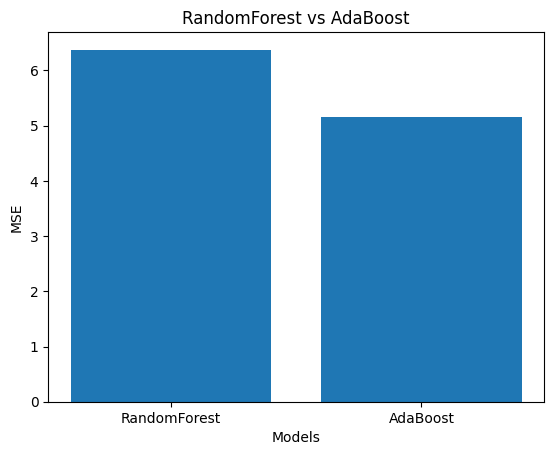

In [33]:
score = [Mse,aMSE]
Models = ["RandomForest","AdaBoost"]
plt.bar(Models,score)
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("RandomForest vs AdaBoost")
plt.show()

In [34]:
import numpy as np


In [35]:
rmse = np.sqrt(mse)
rmse

2.498444863519885